In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df0=pd.read_csv('Estacionkino.dat',sep=',')

In [13]:
df = pd.DataFrame(df0)

In [14]:
df['FECHA'] = pd.to_datetime(df0['TIMESTAMP'])



In [15]:
df.head()
df.dtypes


TIMESTAMP                   object
RECORD                       int64
batt_volt_Min              float64
logger_temp                float64
short_up_Avg               float64
short_dn_Avg               float64
long_up_Avg                float64
long_dn_Avg                float64
cnr4_T_C_Avg               float64
cnr4_T_K_Avg               float64
long_up_corr_Avg           float64
long_dn_corr_Avg           float64
Rs_net_Avg                 float64
Rl_net_Avg                 float64
albedo_Avg                  object
Rn_Avg                     float64
AirTC_Avg                  float64
RH                         float64
WS_ms_S_WVT                float64
WindDir_D1_WVT             float64
WindDir_SD1_WVT            float64
Temp_C_Avg(1)              float64
Temp_C_Avg(2)              float64
Temp_C_Avg(3)              float64
Temp_C_Avg(4)               object
Result1_Avg                 object
Result2_Avg                float64
Result3_Avg                float64
Result4_Avg         

TIMESTAMP                   object
RECORD                       int64
batt_volt_Min              float64
logger_temp                float64
short_up_Avg               float64
short_dn_Avg               float64
long_up_Avg                float64
long_dn_Avg                float64
cnr4_T_C_Avg               float64
cnr4_T_K_Avg               float64
long_up_corr_Avg           float64
long_dn_corr_Avg           float64
Rs_net_Avg                 float64
Rl_net_Avg                 float64
albedo_Avg                  object
Rn_Avg                     float64
AirTC_Avg                  float64
RH                         float64
WS_ms_S_WVT                float64
WindDir_D1_WVT             float64
WindDir_SD1_WVT            float64
Temp_C_Avg(1)              float64
Temp_C_Avg(2)              float64
Temp_C_Avg(3)              float64
Temp_C_Avg(4)               object
Result1_Avg                 object
Result2_Avg                float64
Result3_Avg                float64
Result4_Avg         

In [16]:
Tabla= df.filter(['FECHA','AirTC_Avg'])

In [17]:
Tabla["HORA"]=Tabla["FECHA"].dt.hour
Tabla["DIA"]=Tabla["FECHA"].dt.day
Tabla["MES"]=Tabla["FECHA"].dt.month
Tabla["AÑO"]=Tabla["FECHA"].dt.year

In [18]:
TABLA = Tabla.drop(Tabla[Tabla.index < 24935].index)

In [19]:
TABLA=TABLA.reset_index()

In [21]:
prom=[]
q=0
for y in range(2018,2020):
    for m in range(1,13):
        for d in range(1,32):
            for h in range(0,24):
                a = TABLA['AirTC_Avg'][TABLA['AÑO']==[y]][ TABLA['MES']==[m]][TABLA['DIA']==[d]][ TABLA['HORA']==[h]].mean()
               
                prom.append(a) 
print(len(prom))
            

17856
17856


In [22]:
TIEMPO = pd.date_range('11/01/2018 00:00:00', '02/18/2019 06:00:00 ', freq='H')
len(TIEMPO)

2623

2623

In [23]:
promedio=prom

In [24]:
len(promedio)

17856

17856

In [25]:
d = {'UF': promedio}

In [26]:
hola = pd.DataFrame(d)

In [27]:
hola= hola.dropna()

In [28]:
hola["time"] = TIEMPO 
#hola.tail()

In [29]:
hola.head()

,UF,time
7440,8.708333,2018-11-01 00:00:00
7441,8.493333,2018-11-01 01:00:00
7442,8.690000,2018-11-01 02:00:00
7443,8.846667,2018-11-01 03:00:00
7444,7.397500,2018-11-01 04:00:00


,UF,time
7440,8.708333,2018-11-01 00:00:00
7441,8.493333,2018-11-01 01:00:00
7442,8.690000,2018-11-01 02:00:00
7443,8.846667,2018-11-01 03:00:00
7444,7.397500,2018-11-01 04:00:00


In [30]:
def utf24(x):
    if(x<1.5):
        resultado =0
    elif(x>1.5 and x<=2.4):
        resultado =0.5
    elif(x>2.4 and x<=9.1):
        resultado =1
    elif(x>9.1 and x<=12.4):
        resultado=0.5    
    elif(x>12.4 and x<=15.9):
        resultado =0
    elif(x>15.9 and x<=18):
        resultado =-0.5
    elif(x>18):
         resultado  =-1
    return resultado

In [32]:
pepe= hola.UF.tolist()
h=[]
for i in range(0,len(pepe)):
    h.append(utf24(pepe[i]))

In [33]:
hola["UTF24"]=h


In [34]:
hola["HORA"]=hola["time"].dt.hour
hola["DIA"]=hola["time"].dt.day
hola["MES"]=hola["time"].dt.month
hola["AÑO"]=hola["time"].dt.year

In [36]:
pra = []
TMAX=[]
TMIN=[]
a = hola['UTF24'][hola['AÑO']==[2018]][hola['MES']==[11]][hola['DIA']==[3]].sum()
for y in range(2018,2020):
    for m in range(1,13):
        for d in range(1,32):
            a = hola['UTF24'][hola['AÑO']==[y]][hola['MES']==[m]][hola['DIA']==[d]].mean()
        
            a=a*24
            #print(a,d,m,y)  
            pra.append(a)

-9.5
-9.5


In [37]:
olv=pra

In [38]:
date = pd.date_range('11/01/2018', '02/18/2019', freq='D')
len(date)

110

110

In [39]:
d = {'SUMA_UF': olv}


In [40]:
SumaUF= pd.DataFrame(d)
SumaUF=SumaUF.dropna()
SumaUF.describe()
SumaUF["FECHA"] = date
SumaUF.head()



,SUMA_UF,FECHA
310,-0.5,2018-11-01
311,-9.0,2018-11-02
312,-9.5,2018-11-03
313,-11.5,2018-11-04
314,-8.0,2018-11-05


,SUMA_UF,FECHA
310,-0.5,2018-11-01
311,-9.0,2018-11-02
312,-9.5,2018-11-03
313,-11.5,2018-11-04
314,-8.0,2018-11-05


In [41]:
TMaxDia = TABLA.groupby([TABLA["AÑO"],TABLA["MES"],TABLA["DIA"]])['AirTC_Avg'].agg({"max"})
TMaxDia = TMaxDia["max"].tolist()
TMinDia = TABLA.groupby([TABLA["AÑO"],TABLA["MES"],TABLA["DIA"]])['AirTC_Avg'].agg({"min"})
TMinDia = TMinDia["min"].tolist()
SumaUF["Tmax"]=TMaxDia
SumaUF["Tmin"]=TMinDia


In [50]:
SumaUF["AcumuladaUF"]=np.cumsum(SumaUF["SUMA_UF"])

In [51]:
SumaUF.tail()

,SUMA_UF,FECHA,Tmax,Tmin,AcumuladaUF
416,-12.5,2019-02-14,29.090,9.340,-279.0
417,-19.5,2019-02-15,27.690,14.110,-298.5
418,-4.0,2019-02-16,23.510,6.545,-302.5
419,3.0,2019-02-17,20.990,3.259,-299.5
420,24.0,2019-02-18,7.028,3.243,-275.5


,SUMA_UF,FECHA,Tmax,Tmin,AcumuladaUF
416,-12.5,2019-02-14,29.090,9.340,-279.0
417,-19.5,2019-02-15,27.690,14.110,-298.5
418,-4.0,2019-02-16,23.510,6.545,-302.5
419,3.0,2019-02-17,20.990,3.259,-299.5
420,24.0,2019-02-18,7.028,3.243,-275.5


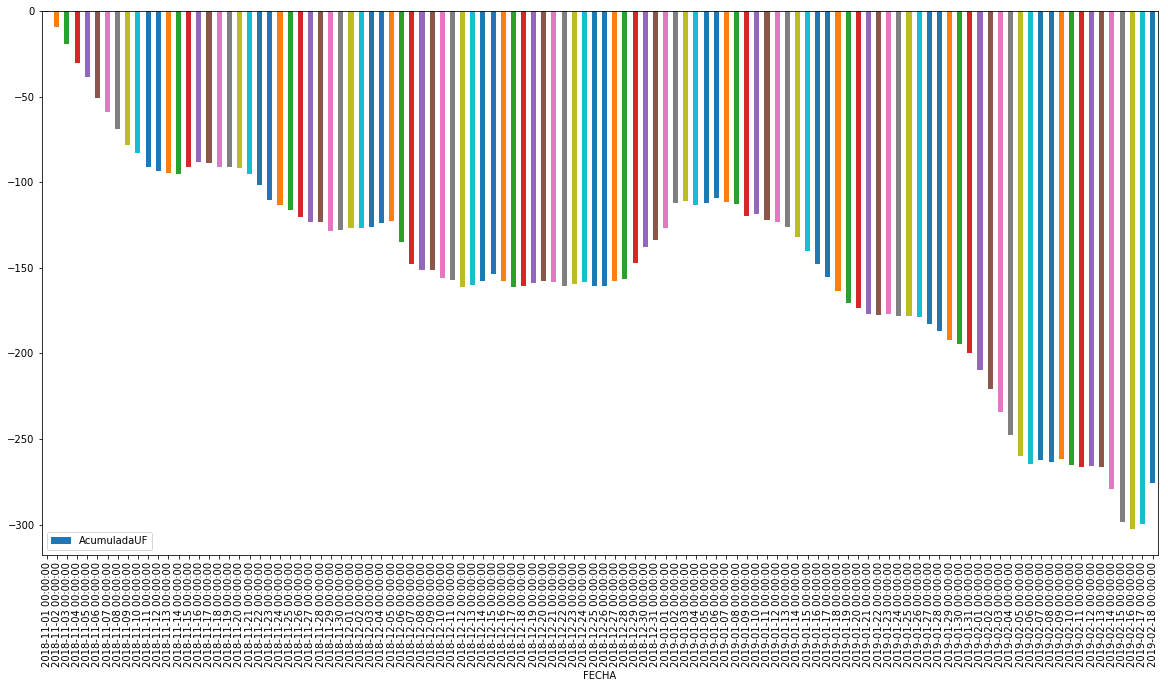

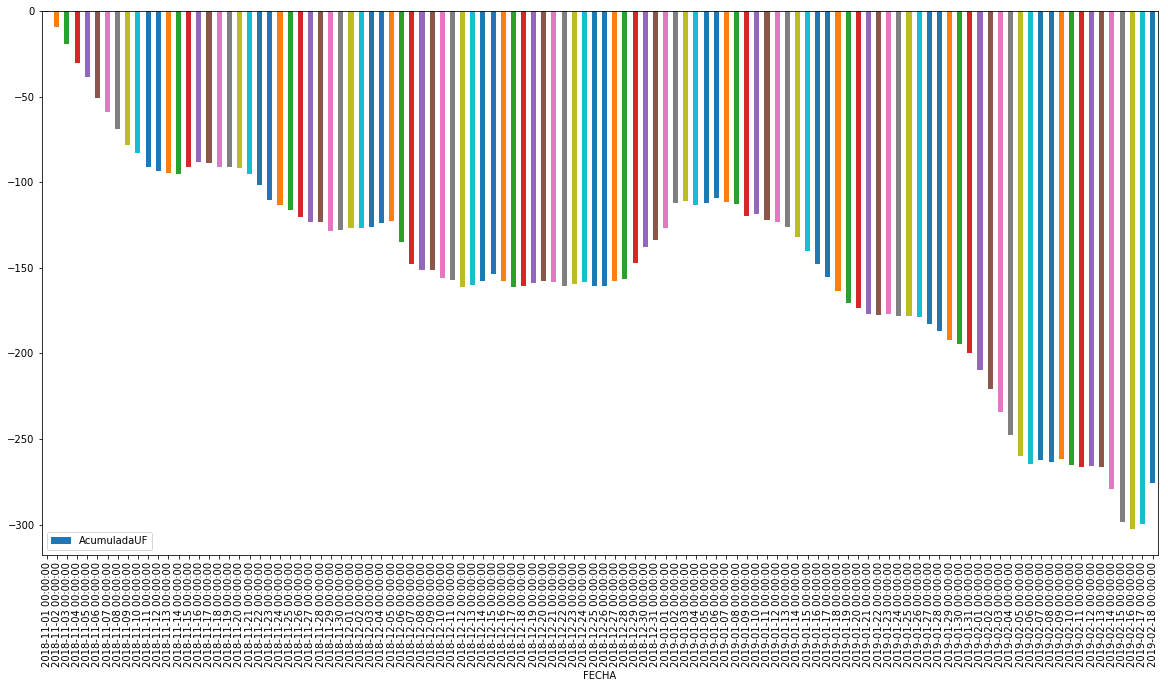

In [52]:
SumaUF.plot(x="FECHA",y="AcumuladaUF",kind="bar",figsize=(20,10),rot=90,fontsize=10)

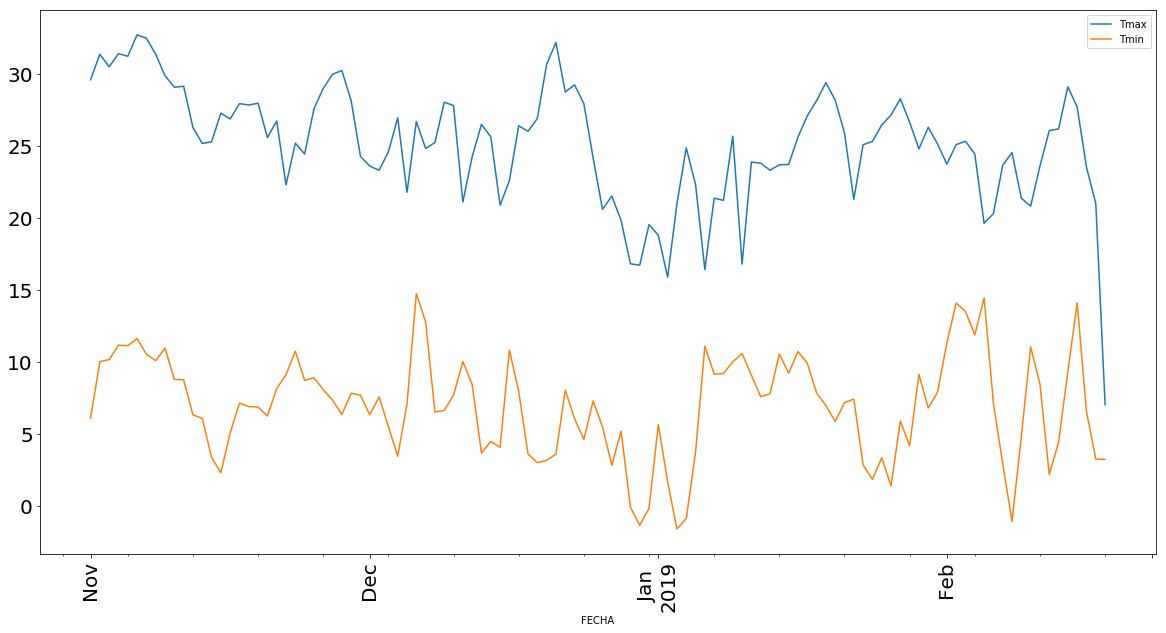

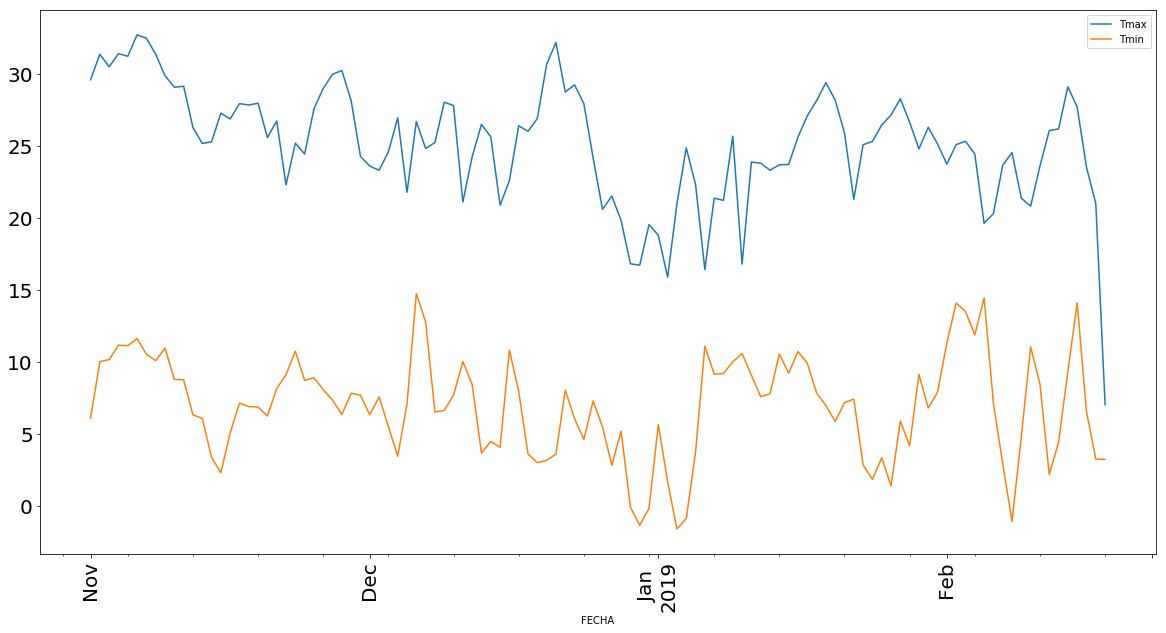

In [53]:
SumaUF.plot(x="FECHA",y=["Tmax","Tmin"],figsize=(20,10),rot=90,fontsize=20)
